# Temporality of POTUS' tweets:

I am currently enrolled in this course at Stanford continuing studies school titled: _POL 35 — Journalism Under Siege? Truth and Trust in a Time of Turmoil_ (Course link: https://continuingstudies.stanford.edu/courses/liberal-arts-and-sciences/journalism-under-siege-truth-and-trust-in-a-time-of-turmoil/20181_POL-35) 

Week-2 of the course covered the topic "Power to the People: Holding the Powerful Accountable". During the second half of the class, two journalists Sally Buzbee (Executive Editor, The Associated Press) and  Daniel Dale (Correspondent, The Toronto Star) referred to some of the new challenges that have emerged during President-45's administration. They spoke of three aspects of the tweet-storm that emanated from the POTUS himself: _Velocity_, _Source_ and _Timing_

By source, I mean the person and the device from which the tweets were literally typed.
With regards to the temporal aspects, I was exposed to these interesting claims that a substantial chunk of the tweets were being tweeted in the wee hours of the morn and that this timing coincided with the TV show titled 'Fox and Friends'.

Below, I study and quantify this claim in terms of numbers.

# Step uno: Install tweepy if you haven't:

In [1]:
!pip install tweepy

In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
from tqdm import tqdm
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Authentication credentials for using the twitter API:

In [3]:
from credentials import CONSUMER_KEY, CONSUMER_SECRET,ACCESS_TOKEN,ACCESS_SECRET 

# Actually tweet scraping:

## Help source: https://gist.github.com/yanofsky/5436496

_Note that Twitter only allows access to a users most recent 3240 tweets with this method_

In [4]:

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
api = tweepy.API(auth)

screen_name="realDonaldTrump"

#initialize a list to hold all the tweepy Tweets
alltweets = []	

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name,count=200)



Neat. Now. let's explore the object new_tweets object that is returned.

```
dir(new_tweets[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']
 
 ```
 
 Should you feel goaded to explore further, here are the resources. I will revisit these in the forthcoming notebooks:

Resource page:

<img src="tweet_objects.png",width=600,height=600>

Links:

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html


https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object.html



Note to self: Interesting attributes from the twitter API documentation.

```
list_components=[ 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']
for comp in list_components:
    
    print('\n ___________')
    print(comp)
    print(new_tweets[0].__getattribute__(comp))
    
```

# Let's take a small detour to study the author field itself and save it as a dataframe:

In [5]:
author_attrib_list=dir(new_tweets[0].author)
df_useful_attribs=pd.DataFrame(columns=['field','Author_attribute'])
ind=0
for attrib in author_attrib_list:
    
    if((attrib[0]!='_')&(attrib!='entities')):
        df_useful_attribs.loc[ind,'field']=attrib
        df_useful_attribs.loc[ind,'Author_attribute']=new_tweets[0].author.__getattribute__(attrib)
        ind+=1
df_useful_attribs.to_csv('df_aattribs.csv',index=False)
df_useful_attribs

,field,Author_attribute
0,contributors_enabled,False
1,created_at,2009-03-18 13:46:38
2,default_profile,False
3,default_profile_image,False
4,description,45th President of the United States of America🇺🇸
5,favourites_count,25
6,follow,<bound method User.follow of User(_api=<tweepy...
7,follow_request_sent,False
8,followers,<bound method User.followers of User(_api=<twe...
9,followers_count,55128105


# Neat! Now, let's resume and mined the 3200+ most recent tweets:

In [6]:
#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print("...%s tweets downloaded so far" % (len(alltweets)))

# #transform the tweepy tweets into a 2D array that will populate the csv	
# outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

# #write the csv	
# with open('%s_tweets.csv' % screen_name, 'wb') as f:
#     writer = csv.writer(f)
#     writer.writerow(["id","created_at","text"])
#     writer.writerows(outtweets)

# pass

getting tweets before 1044269053274193919
...400 tweets downloaded so far
getting tweets before 1039292858715578373
...600 tweets downloaded so far
getting tweets before 1033500723709992959
...800 tweets downloaded so far
getting tweets before 1027200569096765440
...1000 tweets downloaded so far
getting tweets before 1021711954589696000
...1200 tweets downloaded so far
getting tweets before 1014146835135516671
...1400 tweets downloaded so far
getting tweets before 1008357782410711040
...1600 tweets downloaded so far
getting tweets before 1002027245131661311
...1800 tweets downloaded so far
getting tweets before 993475610377932800
...2000 tweets downloaded so far
getting tweets before 984631073865953279
...2200 tweets downloaded so far
getting tweets before 972271520847466497
...2400 tweets downloaded so far
getting tweets before 960906105982463999
...2600 tweets downloaded so far
getting tweets before 949066181381632000
...2800 tweets downloaded so far
getting tweets before 93730927925

In [7]:
n_tweets=len(alltweets)
n_tweets

3243

# I have hand-picked some of the useful tweet attributes that I deem are worthy of analysis besides the timestamps that form the original object of study:

In [8]:
useful_cols=['coordinates',
 'created_at',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'retweet_count',
 'retweeted',
 'source',
 'source_url',
 'text',
 'truncated']
df_tweets=pd.DataFrame(columns=useful_cols)


In [9]:
for i in tqdm(range(n_tweets)):
    for col in useful_cols:
        try:
            df_tweets.loc[i,col]=alltweets[i].__getattribute__(col)
        except:
            df_tweets.loc[i,col]='Unavailable'

100%|██████████| 3243/3243 [00:22<00:00, 144.90it/s]


In [11]:
df_tweets.to_csv('df_tweets.csv',index=False)

In [12]:
df_tweets.head(5)

,coordinates,created_at,favorite_count,favorited,geo,id,in_reply_to_screen_name,in_reply_to_status_id,is_quote_status,lang,place,possibly_sensitive,retweet_count,retweeted,source,source_url,text,truncated
0,None,2018-10-14 22:44:59,0,False,None,1051604811530072066,None,None,False,en,None,Unavailable,9731,False,Twitter for iPhone,http://twitter.com/download/iphone,RT @realDonaldTrump: I will be interviewed on ...,False
1,None,2018-10-14 19:54:20,51810,False,None,1051561865061502977,None,None,True,en,None,False,13051,False,Twitter for iPhone,http://twitter.com/download/iphone,Thank you to NBC for the correction! https://t...,False
2,None,2018-10-14 19:45:05,45492,False,None,1051559539605164034,None,None,True,en,None,False,9186,False,Twitter for iPhone,http://twitter.com/download/iphone,Thank you! https://t.co/CrExOML9Mi,False
3,None,2018-10-14 19:44:20,0,False,None,1051559350047821826,None,None,False,und,None,False,4885,False,Twitter for iPhone,http://twitter.com/download/iphone,RT @IVT2020: @realDonaldTrump https://t.co/cvY...,False
4,None,2018-10-14 19:39:16,48219,False,None,1051558072433463297,None,None,False,en,None,Unavailable,9731,False,Twitter for iPhone,http://twitter.com/download/iphone,I will be interviewed on “60 Minutes” tonight ...,False


# ANALYSIS

## OK. Now that the data has been collected, let's look at Question-1: What was the literal device source from which the tweets were typed?
The twitter API provides for a 'source' field. [Reference link: 
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object ]

source	: String	: *Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.
Example: "source":"Twitter for Mac"*

So, here are the results:

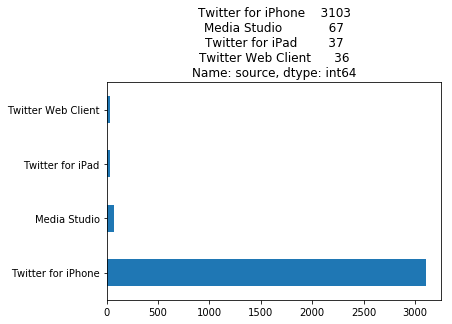

In [13]:
df_tweets.source.value_counts().plot(kind='barh');
plt.title(df_tweets.source.value_counts());

In [14]:
df_tweets.source.value_counts()

Twitter for iPhone    3103
Media Studio            67
Twitter for iPad        37
Twitter Web Client      36
Name: source, dtype: int64

If you are wondering what 'Media studio' is from where 67 tweets seem to have emanated, here is twitter's official description:
*"Media Studio, which replaces video.twitter.com, is an even more comprehensive desktop destination where you can access all of our video publishing tools and resources in one place."*


https://blog.twitter.com/official/en_au/a/2016/au-launching-twitter-media-studio.html

Also, as far the iPhone usage is concerned, politico had a story on this that you can access here:

https://www.politico.com/story/2018/05/21/trump-phone-security-risk-hackers-601903

# Question-2 - Time aspect of it all:

Before we answer that question, we need t pay a lip service to careful timestamp conversion. According to the API documentation:

Field: 'created_at' :String	: UTC time when this Tweet was created. 

Example: "created_at":"Wed Aug 27 13:08:45 +0000 2008"

OK, so we need to convert all the timestamps from UTC to Wasington DC local time, which would be US/Eastern.  Before, we use the *pytz* solution, let's build some ground-truth for verification. Howevering over the tweet gives you the local time of posting of the tweet. Also, inspecting the source (By either Right- Click + 'inspect source' or Ctrl+Shift+I in chrome) gives you the Unix epoch time stamp that can then be converted to the local time. So, let's check the latest tweet in the image below:


<img src="sanity_check.png",width=600,height=600>

OK, so both the methods point to the fact that the tweet was posted at 15:54 pm Eastern time or 12:54 Pacific time. 

In [15]:
import pytz
from datetime import datetime

est = pytz.timezone('US/Eastern')
utc = pytz.utc

print(df_tweets.text[0], utc.localize(df_tweets.created_at[0]).astimezone(est))

RT @realDonaldTrump: I will be interviewed on “60 Minutes” tonight at 7:00 P.M., after NFL game. Enjoy! 2018-10-14 18:44:59-04:00


In [16]:
# SO, LET'S VEREIFY IT!
utc.localize(df_tweets.created_at[0]).astimezone(est).hour

18

 ##  BOOM! 
 Cool. So, let's add a column of *hour_DC* to the dataframe

In [17]:
def convert_ET(ts):
    return utc.localize(ts).astimezone(est)
def convert_ET_hour(ts):
    return utc.localize(ts).astimezone(est).hour
def convert_ET_weekday(ts):
    return utc.localize(ts).astimezone(est).weekday()


In [18]:
df_tweets['time_EST']=df_tweets.created_at.apply(convert_ET)
df_tweets['time_hr']=df_tweets.created_at.apply(convert_ET_hour)
df_tweets['time_weekday']=df_tweets.created_at.apply(convert_ET_weekday)

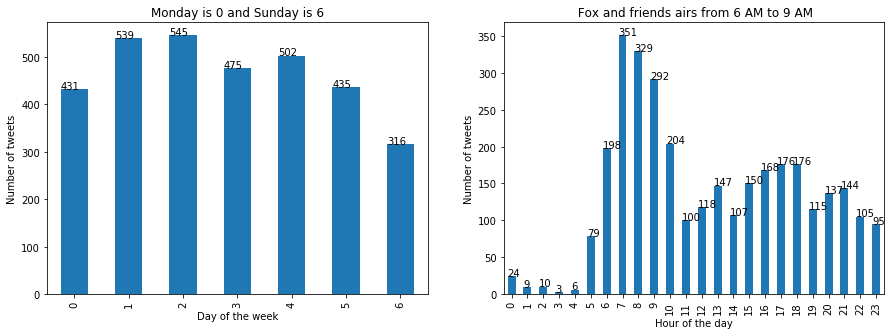

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
count=df_tweets.time_weekday.value_counts().sort_index().values
x_vec=df_tweets.time_weekday.value_counts().sort_index().index.values
df_tweets.time_weekday.value_counts().sort_index().plot(kind='bar');
for i in range(len(x_vec)):
    plt.text(x = x_vec[i]-0.25 , y = count[i]+0.2, s = count[i], size = 10)

plt.title('Monday is 0 and Sunday is 6')
plt.ylabel('Number of tweets');
plt.xlabel('Day of the week');

###############################


plt.subplot(122)
count=df_tweets.time_hr.value_counts().sort_index().values
x_vec=df_tweets.time_hr.value_counts().sort_index().index.values
df_tweets.time_hr.value_counts().sort_index().plot(kind='bar');
for i in range(len(x_vec)):
    plt.text(x = x_vec[i]-0.25 , y = count[i]+0.2, s = count[i], size = 10)

plt.title(' Fox and friends airs from 6 AM to 9 AM')
plt.ylabel('Number of tweets');
plt.xlabel('Hour of the day');
######################


So yeah, the peaks between 6 AM and 9 AM is what the press has labelled as 'hyperaggressive early morning tweetstorms' (Link: https://www.politico.com/magazine/story/2018/01/05/trump-media-feedback-loop-216248 ) also widely hypothesized to be fuelled by what seems like a 3 hour show titled 'Fox & Friends' (Never watched it. Don't wake up that early)

Additional link: https://www.mediamatters.org/blog/2017/03/20/bigotry-and-idiocy-donald-trumps-favorite-news-show/215759

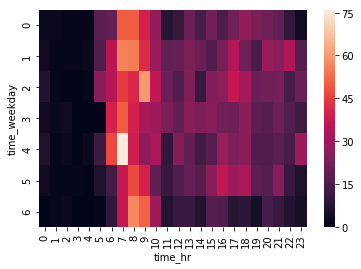

In [20]:
ct_day_hr=pd.crosstab(df_tweets.time_weekday,df_tweets.time_hr)
sns.heatmap(ct_day_hr)

# Is there a chance that this 6-9 am tweet storm has significant contribution from source devices that might not be his iPhone?

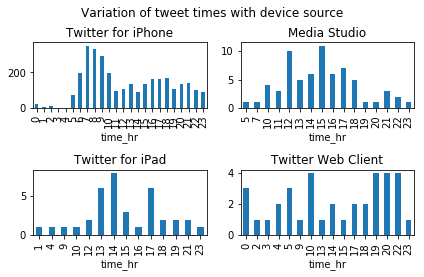

In [22]:
df_source=df_tweets.groupby('source')['time_hr'].value_counts().sort_index()
source_list=df_tweets.source.unique()
for i,src in enumerate(source_list):
    plt.subplot(2,2,i+1)
    df_source[src].plot(kind='bar')
    plt.title(src)

plt.suptitle('Variation of tweet times with device source')
plt.tight_layout( rect=[0, 0.03, 1, 0.95]) 

# Nope!